### Presented by: Princilla Abena Koranteng

This is a supervised machine learning project where Regression is used to predict continuous values.


Regression in machine learning is a type of supervised learning that is used to predict a continuous outcome variable (also called the dependent variable or label) based on one or more input features (also called independent variables or predictors). The goal of regression is to find a relationship between the input features and the output variable, and then use that relationship to make predictions on new, unseen data.

In [1]:
# Library for handling data and processing numbers
import pandas as pd
import numpy as np

# Libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn

# Reducing warning content
import warnings

warnings.filterwarnings("ignore")

## Data Importation

In [2]:
# Importing the data
df = pd.read_csv("../analysis_hackfest/assets/FuelConsumptionCo2.csv")

## Exploratory Data Analysis

In [3]:
df.drop(columns=["MODEL_YEAR"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MAKE                       1067 non-null   object 
 1   MODEL                      1067 non-null   object 
 2   VEHICLE_CLASS              1067 non-null   object 
 3   ENGINE_SIZE                1067 non-null   float64
 4   CYLINDERS                  1067 non-null   int64  
 5   TRANSMISSION               1067 non-null   object 
 6   FUEL_TYPE                  1067 non-null   object 
 7   FUEL_CONSUMPTION_CITY      1067 non-null   float64
 8   FUEL_CONSUMPTION_HWY       1067 non-null   float64
 9   FUEL_CONSUMPTION_COMB      1067 non-null   float64
 10  FUEL_CONSUMPTION_COMB_MPG  1067 non-null   int64  
 11  CO2_EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 100.2+ KB


Data has only float,object and integer values.

In [4]:
df.shape

(1067, 12)

Original Data contains 7385 observations and 12 columns

In [5]:
df.isnull().values.any()

False

There are no missing values

In [6]:
# Dropping Duplicates
df.drop_duplicates(keep="first", inplace=True)
df.shape

(1067, 12)

After removing the duplicates, we are left with 6282 observations and 12 columns

In [7]:
df.describe()

,ENGINE_SIZE,CYLINDERS,FUEL_CONSUMPTION_CITY,FUEL_CONSUMPTION_HWY,FUEL_CONSUMPTION_COMB,FUEL_CONSUMPTION_COMB_MPG,CO2_EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


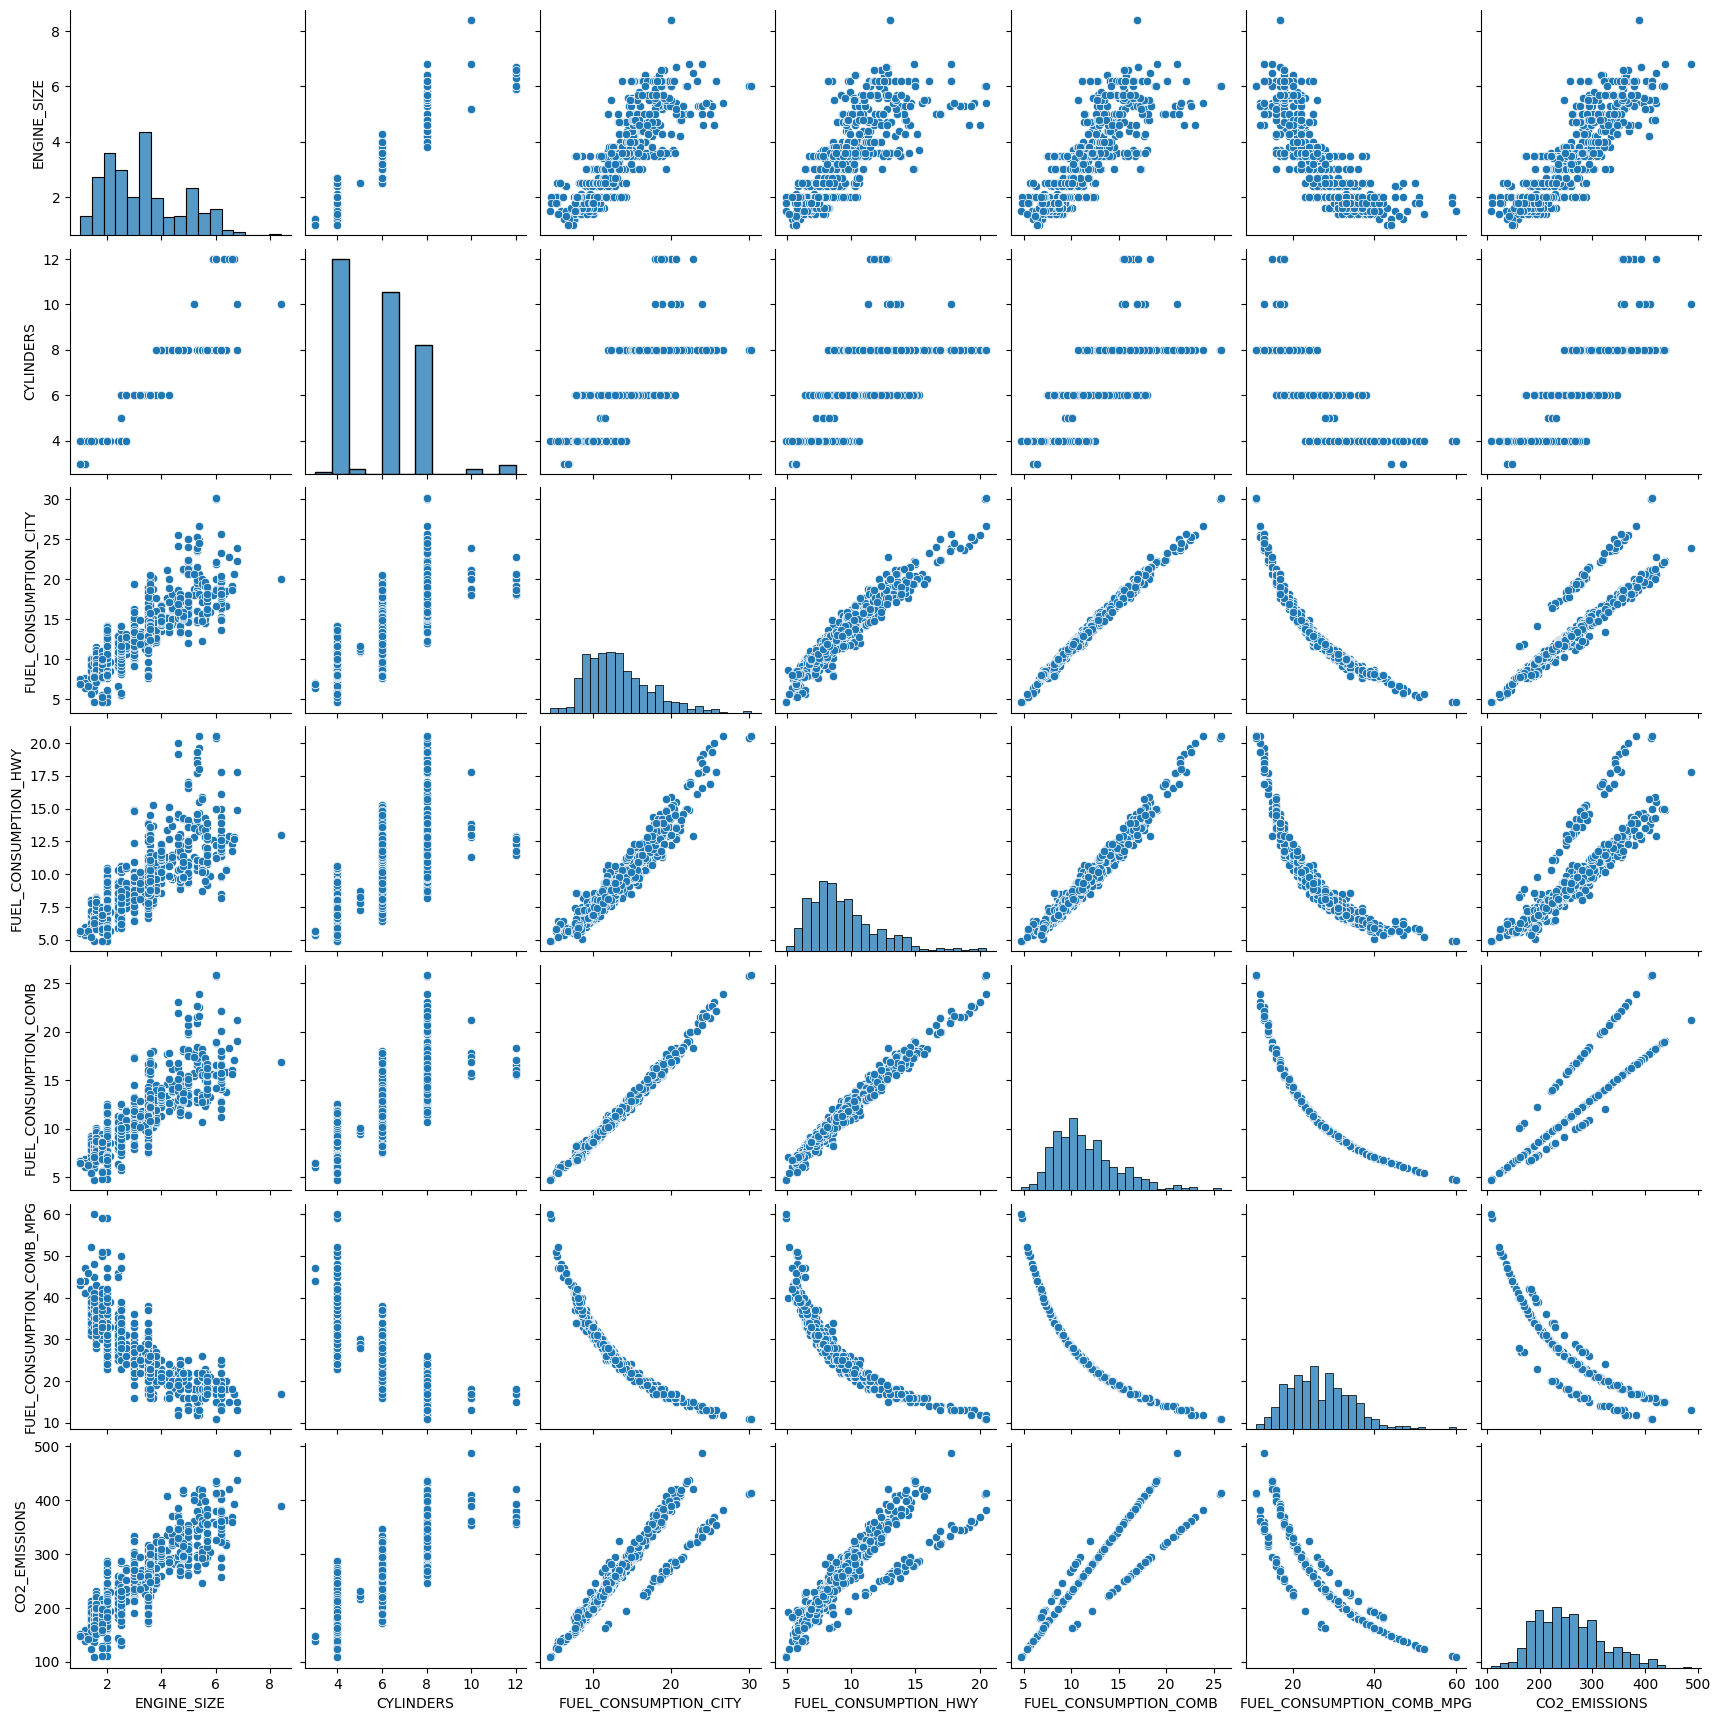

In [8]:
sns.pairplot(df)

Based on the pairplot above, it is noted that,

1. As engine size increases:

* fuel consumption (L/100km) increases
* the number of cylinders increases

2. CO2 Emissions generally increase with increase in all the features with the exception of 'Fuel Consumption Com (mpg)' where there is an inverse non-linear relationship

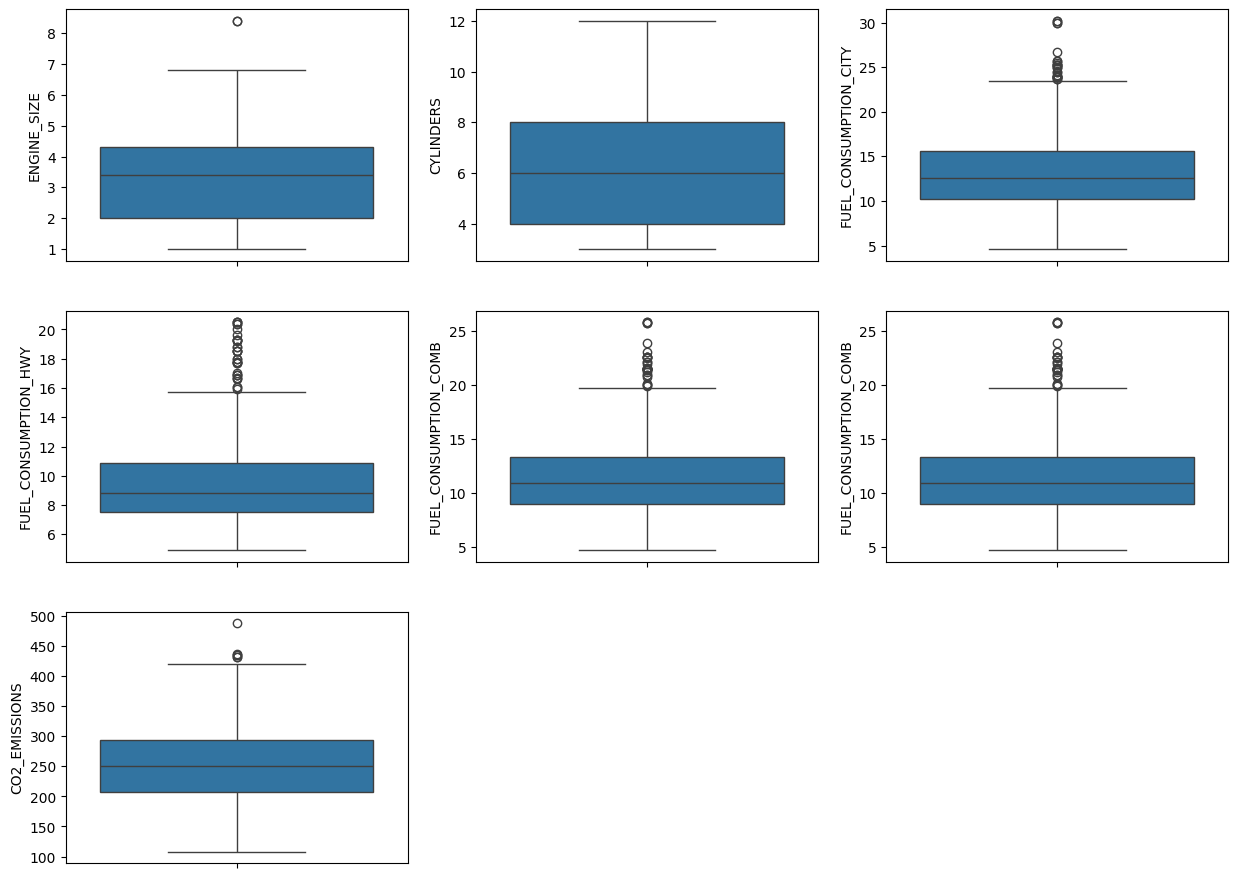

In [9]:
columns = [
    "ENGINE_SIZE",
    "CYLINDERS",
    "FUEL_CONSUMPTION_CITY",
    "FUEL_CONSUMPTION_HWY",
    "FUEL_CONSUMPTION_COMB",
    "FUEL_CONSUMPTION_COMB",
    "CO2_EMISSIONS",
]
j = 1
fig = plt.figure(figsize=(15, 15))
for i in columns:
    plt.subplot(4, 3, j)
    sns.boxplot(df[i])
    j = j + 1

The distribution of values in the various columns indicate the need for scaling features since there non-uniformly distributed values in a number of the columns

In [11]:
# constructing a heatmap to understand the correlation between the columns
# plt.figure(figsize=(10, 10))
# heatmap = sns.heatmap(
#     df.corr(),
#     cbar=True,
#     square=True,
#     fmt=".1f",
#     annot=True,
#     annot_kws={"size": 8},
#     cmap="Blues",
# )
# heatmap.set_title("Correlation Heatmap", fontdict={"fontsize": 18}, pad=12)

In [12]:
## Dropping 'Fuel Consumption Hwy (L/100 km)' and 'Fuel Consumption City (L/100 km)'
## because they have perfect correlation with 'Fuel Consumption Comb (L/100 km)'
df.drop(
    columns=["FUEL_CONSUMPTION_CITY", "FUEL_CONSUMPTION_HWY"],
    inplace=True,
)

In [13]:
for i in df.columns:
    print(f"{i}: {df[i].nunique()}")

MAKE: 39
MODEL: 663
VEHICLE_CLASS: 16
ENGINE_SIZE: 45
CYLINDERS: 7
TRANSMISSION: 22
FUEL_TYPE: 4
FUEL_CONSUMPTION_COMB: 148
FUEL_CONSUMPTION_COMB_MPG: 43
CO2_EMISSIONS: 159


In [14]:
df

,MAKE,MODEL,VEHICLE_CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONSUMPTION_COMB,FUEL_CONSUMPTION_COMB_MPG,CO2_EMISSIONS
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...
1062,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,11.8,24,271
1063,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,11.5,25,264
1064,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,11.8,24,271
1065,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,11.3,25,260


In [15]:
# Encoding only fuel type,vehicle class and Transmission out of all the non-numeric features
# using pd.get_dummies since the rest contain too many unique values and will increase the feature so much
df.drop(columns=["MAKE", "MODEL", "TRANSMISSION"], inplace=True)
fuelType_encoded = pd.get_dummies(df["FUEL_TYPE"], prefix="FUEL", drop_first=True)
vehicleClass_encoded = pd.get_dummies(
    df["VEHICLE_CLASS"], prefix="VEHICLE", drop_first=True
)
df.drop(columns=["FUEL_TYPE", "VEHICLE_CLASS"], axis=1, inplace=True)
df_encoded = pd.concat([df, fuelType_encoded, vehicleClass_encoded], axis=1)

In [16]:
df_encoded.drop_duplicates(keep="first", inplace=True)

In [17]:
df_encoded.shape

(791, 23)

In [18]:
df

,ENGINE_SIZE,CYLINDERS,FUEL_CONSUMPTION_COMB,FUEL_CONSUMPTION_COMB_MPG,CO2_EMISSIONS
0,2.0,4,8.5,33,196
1,2.4,4,9.6,29,221
2,1.5,4,5.9,48,136
3,3.5,6,11.1,25,255
4,3.5,6,10.6,27,244
...,...,...,...,...,...
1062,3.0,6,11.8,24,271
1063,3.2,6,11.5,25,264
1064,3.0,6,11.8,24,271
1065,3.2,6,11.3,25,260


### Presented by: Princilla Abena Koranteng

## Building Models

In [20]:
X = df_encoded.drop(["CO2_EMISSIONS"], axis=1)
y = df_encoded["CO2_EMISSIONS"]

In [21]:
X

,ENGINE_SIZE,CYLINDERS,FUEL_CONSUMPTION_COMB,FUEL_CONSUMPTION_COMB_MPG,FUEL_E,FUEL_X,FUEL_Z,VEHICLE_FULL-SIZE,VEHICLE_MID-SIZE,VEHICLE_MINICOMPACT,...,VEHICLE_PICKUP TRUCK - STANDARD,VEHICLE_SPECIAL PURPOSE VEHICLE,VEHICLE_STATION WAGON - MID-SIZE,VEHICLE_STATION WAGON - SMALL,VEHICLE_SUBCOMPACT,VEHICLE_SUV - SMALL,VEHICLE_SUV - STANDARD,VEHICLE_TWO-SEATER,VEHICLE_VAN - CARGO,VEHICLE_VAN - PASSENGER
0,2.0,4,8.5,33,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2.4,4,9.6,29,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.5,4,5.9,48,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3.5,6,11.1,25,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,3.5,6,10.6,27,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,3.2,6,11.2,25,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1062,3.0,6,11.8,24,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1063,3.2,6,11.5,25,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1065,3.2,6,11.3,25,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [34]:
from sklearn.pipeline import Pipeline

# Data Preprocessing Imports
from sklearn.preprocessing import StandardScaler

# Ensemble Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor


# Tree models
from sklearn.tree import DecisionTreeRegressor

# Metric Imports
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Model Selection imports
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Linear Model imports
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Neighbors models
from sklearn.neighbors import KNeighborsRegressor

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
sc = StandardScaler()

In [47]:
scores = {}

## 1. RandomForestRegressor

In [48]:
# Creating a RandomForestRegressor with scaling
rf = RandomForestRegressor(n_estimators=100)
steps = [("sc", sc), ("rf", rf)]
rfscale = Pipeline(steps)
rfscale.fit(X_train, y_train)

Pipeline(steps=[('sc', StandardScaler()), ('rf', RandomForestRegressor())])

In [49]:
cv_scaled = cross_val_score(
    rfscale, X_train, y_train, scoring="neg_mean_squared_error", cv=4
)
cv_scaled.mean()

-91.72214015613595

### Tuninig RandomForest Parameters

In [50]:
rfnew = RandomForestRegressor(random_state=2)
rfpipe = Pipeline(steps=[("sc", sc), ("rfnew", rfnew)])
params = dict(
    rfnew__max_depth=list(range(2, 8)), rfnew__n_estimators=list(range(50, 150))
)

In [51]:
rcv = RandomizedSearchCV(rfpipe, params, scoring="neg_mean_squared_error", cv=4)

In [52]:
rcv.fit(X_train, y_train)
rcv.best_estimator_.get_params()

{'memory': None,
 'steps': [('sc', StandardScaler()),
  ('rfnew',
   RandomForestRegressor(max_depth=7, n_estimators=71, random_state=2))],
 'verbose': False,
 'sc': StandardScaler(),
 'rfnew': RandomForestRegressor(max_depth=7, n_estimators=71, random_state=2),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'rfnew__bootstrap': True,
 'rfnew__ccp_alpha': 0.0,
 'rfnew__criterion': 'squared_error',
 'rfnew__max_depth': 7,
 'rfnew__max_features': 1.0,
 'rfnew__max_leaf_nodes': None,
 'rfnew__max_samples': None,
 'rfnew__min_impurity_decrease': 0.0,
 'rfnew__min_samples_leaf': 1,
 'rfnew__min_samples_split': 2,
 'rfnew__min_weight_fraction_leaf': 0.0,
 'rfnew__monotonic_cst': None,
 'rfnew__n_estimators': 71,
 'rfnew__n_jobs': None,
 'rfnew__oob_score': False,
 'rfnew__random_state': 2,
 'rfnew__verbose': 0,
 'rfnew__warm_start': False}

Based on the randomized search, the choice max_depth is 7 and the n_estimators is 144

In [53]:
rf_final1 = RandomForestRegressor(max_depth=7, n_estimators=144, random_state=2)
rf_final1.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=144, random_state=2)

In [54]:
pred1 = rf_final1.predict(X_test)
rf_mse = mean_squared_error(y_test, pred1)
rf_mse

52.90068481232065

In [55]:
rf_rsquared = r2_score(y_test, pred1)
rf_rsquared

0.9866345630261031

In [56]:
scores["RandomForestRegressor"] = {"rmse": rf_mse, "r2": rf_rsquared}

Mean squared of **21.510** and r2_score of **0.9942** for RandomForestRegressor

## 2. SGDRegressor

In [57]:
# creating SGDRegressor with scaling
sgd = SGDRegressor(random_state=3)
sgdscale = Pipeline(steps=[("sc", sc), ("sgd", sgd)])
sgdscale.fit(X_train, y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('sgd', SGDRegressor(random_state=3))])

In [58]:
cv_scaled = cross_val_score(
    sgdscale, X_train, y_train, scoring="neg_mean_squared_error", cv=4
)
cv_scaled.mean()

-31.990201795043507

### Tuning Parameters

In [59]:
sgdnew = SGDRegressor(random_state=3, max_iter=3000)
params = dict(
    sgdnew__loss=["squared_error", "huber", "epsilon_insensitive"],
    sgdnew__alpha=np.geomspace(0.001, 10),
)

In [60]:
sgdpipe = Pipeline(steps=[("sc", sc), ("sgdnew", sgdnew)])
sgdrcv = RandomizedSearchCV(sgdpipe, params, n_jobs=-1)

In [61]:
sgdrcv.fit(X_train, y_train)
sgdrcv.best_estimator_.get_params()

/home/nozwock/.cache/pypoetry/virtualenvs/analysis-hackathon-79IcsoNz-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/nozwock/.cache/pypoetry/virtualenvs/analysis-hackathon-79IcsoNz-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/nozwock/.cache/pypoetry/virtualenvs/analysis-hackathon-79IcsoNz-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/nozwock/.cache/pypoetry/virtualenvs/analysis-hackathon-79IcsoNz-py3.11/lib/python3.11/site-packag

{'memory': None,
 'steps': [('sc', StandardScaler()),
  ('sgdnew',
   SGDRegressor(alpha=0.0021209508879201904, max_iter=3000, random_state=3))],
 'verbose': False,
 'sc': StandardScaler(),
 'sgdnew': SGDRegressor(alpha=0.0021209508879201904, max_iter=3000, random_state=3),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'sgdnew__alpha': 0.0021209508879201904,
 'sgdnew__average': False,
 'sgdnew__early_stopping': False,
 'sgdnew__epsilon': 0.1,
 'sgdnew__eta0': 0.01,
 'sgdnew__fit_intercept': True,
 'sgdnew__l1_ratio': 0.15,
 'sgdnew__learning_rate': 'invscaling',
 'sgdnew__loss': 'squared_error',
 'sgdnew__max_iter': 3000,
 'sgdnew__n_iter_no_change': 5,
 'sgdnew__penalty': 'l2',
 'sgdnew__power_t': 0.25,
 'sgdnew__random_state': 3,
 'sgdnew__shuffle': True,
 'sgdnew__tol': 0.001,
 'sgdnew__validation_fraction': 0.1,
 'sgdnew__verbose': 0,
 'sgdnew__warm_start': False}

Based on the randomized search, the choice loss is 'epsilon_insensitive' and the alpha is 0.00146

In [62]:
sgd_final1 = SGDRegressor(
    loss="epsilon_insensitive", alpha=0.00146, random_state=2, max_iter=3000
)
sgdpipe = Pipeline(steps=[("sc", sc), ("sgd_final1", sgd_final1)])
sgdpipe.fit(X_train, y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('sgd_final1',
                 SGDRegressor(alpha=0.00146, loss='epsilon_insensitive',
                              max_iter=3000, random_state=2))])

In [63]:
pred1 = sgdpipe.predict(X_test)
sgd_mse = mean_squared_error(y_test, pred1)
sgd_mse

108.27194380197069

In [64]:
sgd_rsquared = r2_score(y_test, pred1)
sgd_rsquared

0.9726449317988882

In [97]:
scores["SGDRegressor"] = {"rmse": sgd_mse, "r2": sgd_rsquared}

SGDRegressor yielded mean_squared_error of **39.496** and r_2 score of **0.989**

## 3. KNeighborsRegressor

In [65]:
kn = KNeighborsRegressor(n_jobs=-1)
kn.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1)

In [66]:
pred = kn.predict(X_test)
print("r2: ", r2_score(y_test, pred))
print("mse: ", mean_squared_error(y_test, pred))

r2:  0.9693824607241092
mse:  121.18487394957984


### Tuning parameters

In [67]:
knn = KNeighborsRegressor(n_jobs=-1)
steps = [("sc", sc), ("knn", knn)]
knnpipe = Pipeline(steps=steps)
params = dict(knn__n_neighbors=list(range(3, 20)))

In [68]:
knncv = GridSearchCV(knnpipe, params, n_jobs=-1)
knncv.fit(X_train, y_train)
knncv.best_estimator_.get_params()

{'memory': None,
 'steps': [('sc', StandardScaler()),
  ('knn', KNeighborsRegressor(n_jobs=-1, n_neighbors=3))],
 'verbose': False,
 'sc': StandardScaler(),
 'knn': KNeighborsRegressor(n_jobs=-1, n_neighbors=3),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': -1,
 'knn__n_neighbors': 3,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [69]:
knn_final1 = KNeighborsRegressor(n_neighbors=3)
knnpipe = Pipeline(steps=[("sc", sc), ("knn_final1", knn_final1)])
knnpipe.fit(X_train, y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('knn_final1', KNeighborsRegressor(n_neighbors=3))])

In [70]:
pred = knnpipe.predict(X_test)
knn_mse = mean_squared_error(y_test, pred)
knn_rsquared = r2_score(y_test, pred)
print("r2: ", knn_rsquared)
print("mse: ", knn_mse)

r2:  0.923237470266315
mse:  303.827731092437


In [98]:
scores["KNeighborsRegressor"] = {"rmse": knn_mse, "r2": knn_rsquared}

## 4. DecisionTreeRegressor

In [71]:
dt = DecisionTreeRegressor(random_state=59)
dtpipe = Pipeline(steps=[("sc", sc), ("dt", dt)])

In [72]:
dtpipe.fit(X_train, y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('dt', DecisionTreeRegressor(random_state=59))])

In [73]:
pred = dtpipe.predict(X_test)
print("r2: ", r2_score(y_test, pred))
print("mse: ", mean_squared_error(y_test, pred))

r2:  0.9870691267623734
mse:  51.180672268907564


### Tuning parameters

In [74]:
dt = DecisionTreeRegressor(random_state=69)
steps = [("sc", sc), ("dt", dt)]
dtpipe = Pipeline(steps=steps)
params = dict(
    dt__max_depth=list(range(2, 10)),
    dt__criterion=["squared_error", "friedman_mse", "absolute_error", "poisson"],
)

In [75]:
dtcv = RandomizedSearchCV(dtpipe, params, random_state=33)
dtcv.fit(X_train, y_train)
dtcv.best_estimator_.get_params()

{'memory': None,
 'steps': [('sc', StandardScaler()),
  ('dt', DecisionTreeRegressor(max_depth=7, random_state=69))],
 'verbose': False,
 'sc': StandardScaler(),
 'dt': DecisionTreeRegressor(max_depth=7, random_state=69),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'dt__ccp_alpha': 0.0,
 'dt__criterion': 'squared_error',
 'dt__max_depth': 7,
 'dt__max_features': None,
 'dt__max_leaf_nodes': None,
 'dt__min_impurity_decrease': 0.0,
 'dt__min_samples_leaf': 1,
 'dt__min_samples_split': 2,
 'dt__min_weight_fraction_leaf': 0.0,
 'dt__monotonic_cst': None,
 'dt__random_state': 69,
 'dt__splitter': 'best'}

In [76]:
dt_final1 = DecisionTreeRegressor(max_depth=7, criterion="squared_error")
dtpipe = Pipeline(steps=[("sc", sc), ("dt_final1", dt_final1)])
dtpipe.fit(X_train, y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('dt_final1', DecisionTreeRegressor(max_depth=7))])

In [77]:
pred = dtpipe.predict(X_test)
dt_mse = mean_squared_error(y_test, pred)
dt_rsquared = r2_score(y_test, pred)
print("r2: ", dt_rsquared)
print("mse: ", dt_mse)

r2:  0.9864568266325275
mse:  53.60416925166838


In [99]:
scores["DecisionTreeRegressor"] = {"rmse": dt_mse, "r2": dt_rsquared}

## 5. VotingRegressor

In [78]:
# Instantiate individual regressors
lasso = Lasso(random_state=42, max_iter=1000)
knn = KNeighborsRegressor(n_jobs=-1)
dtr = DecisionTreeRegressor(random_state=69)

# Define a list called regressors that contains the tuples (regressor_name, regressor)
regressors = [
    ("Lasso Regression", lasso),
    ("KNeighbors Regressor", knn),
    ("Dtree Regressor", dtr),
]

In [79]:
# Iterate over the defined list of tuples containing the classifiers
for reg_name, reg in regressors:
    # fit reg to the training set
    reg.fit(X_train, y_train)

In [80]:
vt = VotingRegressor(estimators=regressors, n_jobs=-1)
vtpipe = Pipeline(steps=[("sc", sc), ("vt", vt)])
vtpipe.fit(X_train, y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('vt',
                 VotingRegressor(estimators=[('Lasso Regression',
                                              Lasso(random_state=42)),
                                             ('KNeighbors Regressor',
                                              KNeighborsRegressor(n_jobs=-1)),
                                             ('Dtree Regressor',
                                              DecisionTreeRegressor(random_state=69))],
                                 n_jobs=-1))])

In [81]:
pred = vtpipe.predict(X_test)
vt_mse = mean_squared_error(y_test, pred)
vt_rsquared = r2_score(y_test, pred)
print("r2: ", vt_rsquared)
print("mse: ", vt_mse)

r2:  0.9812964373203651
mse:  74.02910029168793


In [100]:
scores["VotingRegressor"] = {"rmse": vt_mse, "r2": vt_rsquared}

## 6. AdaBoostRegressor

In [82]:
abr = AdaBoostRegressor(learning_rate=0.1, n_estimators=20)
model_abr = abr.fit(X_train, y_train)

y_pred_abr = model_abr.predict(X_test)
mse = mean_squared_error(y_test, y_pred_abr)
rmns = mse ** (1 / 2)

print("Training set score: {:.2f}".format(model_abr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model_abr.score(X_test, y_test)))

print("mean squared error: {:.2f}".format(mse))

Training set score: 0.94
Test set score: 0.92
mean squared error: 308.47


### Tuning Parameters

In [83]:
adab = AdaBoostRegressor(random_state=69)
steps = [("sc", sc), ("adab", adab)]
adabpipe = Pipeline(steps=steps)
params = dict(
    adab__n_estimators=list(range(20, 100, 10)),
    adab__learning_rate=np.geomspace(0.001, 1),
)

In [84]:
adabcv = RandomizedSearchCV(adabpipe, params, random_state=33)
adabcv.fit(X_train, y_train)
adabcv.best_estimator_.get_params()

{'memory': None,
 'steps': [('sc', StandardScaler()),
  ('adab',
   AdaBoostRegressor(learning_rate=0.655128556859551, n_estimators=90,
                     random_state=69))],
 'verbose': False,
 'sc': StandardScaler(),
 'adab': AdaBoostRegressor(learning_rate=0.655128556859551, n_estimators=90,
                   random_state=69),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'adab__estimator': None,
 'adab__learning_rate': 0.655128556859551,
 'adab__loss': 'linear',
 'adab__n_estimators': 90,
 'adab__random_state': 69}

In [85]:
adab_final1 = AdaBoostRegressor(random_state=69, n_estimators=90, learning_rate=0.0596)
adabpipe = Pipeline(steps=[("sc", sc), ("adab_final1", adab_final1)])
adabpipe.fit(X_train, y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('adab_final1',
                 AdaBoostRegressor(learning_rate=0.0596, n_estimators=90,
                                   random_state=69))])

In [86]:
pred = adabpipe.predict(X_test)
adab_mse = mean_squared_error(y_test, pred)
adab_rsquared = r2_score(y_test, pred)
print("r2: ", adab_rsquared)
print("mse: ", adab_mse)

r2:  0.9327381796191794
mse:  266.2237206922587


In [101]:
scores["AdaBoostRegressor"] = {"rmse": adab_mse, "r2": adab_rsquared}

## 7. GradientBoostingRegressor

In [87]:
gbr = GradientBoostingRegressor(learning_rate=0.01, n_estimators=70)
model_gbr = gbr.fit(X_train, y_train)

y_pred_gbr = model_gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred_gbr)
rmns = mse ** (1 / 2)

print("Training set score: {:.2f}".format(model_gbr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model_gbr.score(X_test, y_test)))

print("mean squared error: {:.2f}".format(mse))

Training set score: 0.70
Test set score: 0.68
mean squared error: 1257.84


### Tuning Parameters

In [88]:
gdab = GradientBoostingRegressor(random_state=69)
steps = [("sc", sc), ("gdab", gdab)]
gdabpipe = Pipeline(steps=steps)
params = dict(
    gdab__n_estimators=list(range(20, 100, 10)),
    gdab__learning_rate=np.geomspace(0.001, 1),
)

In [89]:
gdabcv = RandomizedSearchCV(gdabpipe, params, random_state=33)
gdabcv.fit(X_train, y_train)
gdabcv.best_estimator_.get_params()

{'memory': None,
 'steps': [('sc', StandardScaler()),
  ('gdab',
   GradientBoostingRegressor(learning_rate=0.28117686979742307, n_estimators=60,
                             random_state=69))],
 'verbose': False,
 'sc': StandardScaler(),
 'gdab': GradientBoostingRegressor(learning_rate=0.28117686979742307, n_estimators=60,
                           random_state=69),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'gdab__alpha': 0.9,
 'gdab__ccp_alpha': 0.0,
 'gdab__criterion': 'friedman_mse',
 'gdab__init': None,
 'gdab__learning_rate': 0.28117686979742307,
 'gdab__loss': 'squared_error',
 'gdab__max_depth': 3,
 'gdab__max_features': None,
 'gdab__max_leaf_nodes': None,
 'gdab__min_impurity_decrease': 0.0,
 'gdab__min_samples_leaf': 1,
 'gdab__min_samples_split': 2,
 'gdab__min_weight_fraction_leaf': 0.0,
 'gdab__n_estimators': 60,
 'gdab__n_iter_no_change': None,
 'gdab__random_state': 69,
 'gdab__subsample': 1.0,
 'gdab__tol': 0.0001,
 'gdab__validation_fraction'

In [90]:
gdab_final1 = GradientBoostingRegressor(
    random_state=69, n_estimators=90, learning_rate=0.655
)
gdabpipe = Pipeline(steps=[("sc", sc), ("gdab_final1", gdab_final1)])
gdabpipe.fit(X_train, y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('gdab_final1',
                 GradientBoostingRegressor(learning_rate=0.655, n_estimators=90,
                                           random_state=69))])

In [91]:
pred = gdabpipe.predict(X_test)
gdab_mse = mean_squared_error(y_test, pred)
gdab_rsquared = r2_score(y_test, pred)
print("r2: ", gdab_rsquared)
print("mse: ", gdab_mse)

r2:  0.987706802343887
mse:  48.656738706836386


In [102]:
scores["GradientBoostingRegressor"] = {"rmse": gdab_mse, "r2": gdab_rsquared}

## 8. BaggingRegressor

In [92]:
bag = BaggingRegressor(n_jobs=-1, n_estimators=70)
model_bag = bag.fit(X_train, y_train)

y_pred_bag = model_bag.predict(X_test)
mse = mean_squared_error(y_test, y_pred_bag)
rmns = mse ** (1 / 2)

print("Training set score: {:.2f}".format(model_bag.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model_bag.score(X_test, y_test)))

print("mean squared error: {:.2f}".format(mse))

Training set score: 1.00
Test set score: 0.99
mean squared error: 44.31


### Tuning Parameter

In [93]:
bag = BaggingRegressor(random_state=69)
steps = [("sc", sc), ("bag", bag)]
bagpipe = Pipeline(steps=steps)
params = dict(bag__n_estimators=list(range(20, 100, 10)))

In [94]:
bagcv = RandomizedSearchCV(bagpipe, params, random_state=33)
bagcv.fit(X_train, y_train)
bagcv.best_estimator_.get_params()

{'memory': None,
 'steps': [('sc', StandardScaler()),
  ('bag', BaggingRegressor(n_estimators=70, random_state=69))],
 'verbose': False,
 'sc': StandardScaler(),
 'bag': BaggingRegressor(n_estimators=70, random_state=69),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'bag__bootstrap': True,
 'bag__bootstrap_features': False,
 'bag__estimator': None,
 'bag__max_features': 1.0,
 'bag__max_samples': 1.0,
 'bag__n_estimators': 70,
 'bag__n_jobs': None,
 'bag__oob_score': False,
 'bag__random_state': 69,
 'bag__verbose': 0,
 'bag__warm_start': False}

In [95]:
bag_final1 = BaggingRegressor(random_state=69, n_estimators=60)
bagpipe = Pipeline(steps=[("sc", sc), ("bag_final1", bag_final1)])
bagpipe.fit(X_train, y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('bag_final1',
                 BaggingRegressor(n_estimators=60, random_state=69))])

In [96]:
pred = bagpipe.predict(X_test)
bag_mse = mean_squared_error(y_test, pred)
bag_rsquared = r2_score(y_test, pred)
print("r2: ", bag_rsquared)
print("mse: ", bag_mse)

r2:  0.9889788739242453
mse:  43.621852240896345


In [103]:
scores["BaggingRegressor"] = {"rmse": bag_mse, "r2": bag_rsquared}

In [114]:
for k, v in scores.items():
    print(f"{k}:")
    for k, v in v.items():
        print(f"\t{k}: {v:.6f}")

RandomForestRegressor:
	rmse: 52.900685
	r2: 0.986635
SGDRegressor:
	rmse: 108.271944
	r2: 0.972645
KNeighborsRegressor:
	rmse: 303.827731
	r2: 0.923237
DecisionTreeRegressor:
	rmse: 53.604169
	r2: 0.986457
VotingRegressor:
	rmse: 74.029100
	r2: 0.981296
AdaBoostRegressor:
	rmse: 266.223721
	r2: 0.932738
GradientBoostingRegressor:
	rmse: 48.656739
	r2: 0.987707
BaggingRegressor:
	rmse: 43.621852
	r2: 0.988979


# Choice Model

After evaluating all models, the **GradientBoosting model (gdabpipe)** emerged as the best model **(0.995 and 17.36)** in terms of both r-squared score and mean squared error respectively

# THANK YOU

### Presented by: Princilla Abena Koranteng
